In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import random as rand
import itertools
import matplotlib.cm as cm

In [2]:
# Load and norm df then plot
df = pd.read_csv("DESeq2 Norm Counts/TCGA-BRCA_DESeq2.csv")
df = df.rename(columns = {"Unnamed: 0" : "Genes"}).set_index("Genes")
display(df)

,TCGA-E2-A1L7-01A-11R-A144-07,TCGA-AR-A0U0-01A-11R-A109-07,TCGA-BH-A28O-01A-11R-A22K-07,TCGA-A2-A0D4-01A-11R-A00Z-07,TCGA-E9-A1R4-01A-21R-A14D-07,TCGA-D8-A143-01A-11R-A115-07,TCGA-A2-A0SV-01A-11R-A084-07,TCGA-AN-A0XW-01A-11R-A109-07,TCGA-D8-A1XV-01A-11R-A14M-07,TCGA-A2-A4RW-01A-21R-A266-07,...,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A2-A0SU-01A-11R-A084-07,TCGA-E9-A1NI-01A-11R-A14D-07,TCGA-B6-A0RQ-01A-11R-A115-07,TCGA-E9-A1RF-01A-11R-A157-07,TCGA-A2-A0CX-01A-21R-A00Z-07,TCGA-A2-A25F-01A-11R-A169-07,TCGA-AC-A23G-01A-11R-A213-07,TCGA-E2-A15D-01A-11R-A115-07,TCGA-OL-A5D7-01A-11R-A27Q-07
Genes,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2062.737487,1749.668971,4059.656650,1150.991557,708.147300,6661.031409,965.340810,1368.568602,974.416475,3016.274882,...,2134.475061,10574.695110,580.856912,5439.930414,583.088537,3631.092261,1730.720601,2770.133908,3517.819013,2708.803008
TNMD,19.540438,0.000000,119.584038,33.415884,14.939816,1.084505,3.028520,1.010014,0.000000,9.030763,...,43.085891,8.291092,0.000000,50.244189,35.469777,1.125571,255.227829,14.300101,70.472453,6.751752
DPM1,2210.512050,2281.172187,1356.171576,2012.378787,1935.204225,2829.474267,2391.773819,2206.879997,2296.431811,1615.001471,...,2391.266974,1507.794229,2798.913694,1679.591475,3219.098582,2139.710597,1718.993917,1266.580401,1318.249406,2530.556748
SCYL3,1340.962558,978.274035,1279.992114,1504.457352,1279.844276,1710.264821,1206.108165,1015.063797,2287.884298,1213.132512,...,1232.256495,1606.102887,1319.770127,1131.690552,2196.530852,1626.450191,756.026217,1581.182629,2930.824938,1616.369492
C1orf112,873.213323,661.352863,263.970692,848.020876,546.797282,2316.503271,757.130047,564.597674,661.007668,403.374086,...,323.144186,342.303639,566.368418,317.415673,749.190909,834.048160,607.718154,659.847531,562.121445,2032.277431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDR1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ACTL10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LOC124902537,0.000000,0.000000,5.314846,0.000000,0.000000,0.000000,0.000000,9.090124,0.000000,0.000000,...,2.585153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
# Normalize the df
df[df==0] = 0.001
df = np.log2(df)
df = stats.zscore(df)

In [4]:
df = df.sort_values("Genes")
display(df)

,TCGA-E2-A1L7-01A-11R-A144-07,TCGA-AR-A0U0-01A-11R-A109-07,TCGA-BH-A28O-01A-11R-A22K-07,TCGA-A2-A0D4-01A-11R-A00Z-07,TCGA-E9-A1R4-01A-21R-A14D-07,TCGA-D8-A143-01A-11R-A115-07,TCGA-A2-A0SV-01A-11R-A084-07,TCGA-AN-A0XW-01A-11R-A109-07,TCGA-D8-A1XV-01A-11R-A14M-07,TCGA-A2-A4RW-01A-21R-A266-07,...,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A2-A0SU-01A-11R-A084-07,TCGA-E9-A1NI-01A-11R-A14D-07,TCGA-B6-A0RQ-01A-11R-A115-07,TCGA-E9-A1RF-01A-11R-A157-07,TCGA-A2-A0CX-01A-21R-A00Z-07,TCGA-A2-A25F-01A-11R-A169-07,TCGA-AC-A23G-01A-11R-A213-07,TCGA-E2-A15D-01A-11R-A115-07,TCGA-OL-A5D7-01A-11R-A27Q-07
Genes,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,-1.114211,-1.057791,-1.179569,-1.102438,-1.134783,-1.060701,-1.093670,-1.104765,-1.016087,-1.108563,...,-1.121503,-1.051927,-1.076928,-1.063982,-1.146867,-1.072562,-1.178972,-1.028834,-1.162190,-1.107085
5S_rRNA,0.146204,0.234516,0.047831,0.235817,-0.010760,-1.060701,-0.018703,0.122639,-1.016087,-1.108563,...,-0.024089,0.251194,0.074839,-1.063982,-1.146867,-1.072562,-1.178972,0.165900,-1.162190,-1.107085
5S_rRNA,-1.114211,-1.057791,-1.179569,-1.102438,-1.134783,-1.060701,-1.093670,-1.104765,-1.016087,-1.108563,...,-1.121503,-1.051927,-1.076928,-1.063982,-1.146867,-1.072562,-1.178972,-1.028834,-1.162190,-1.107085
7SK,-1.114211,-1.057791,-1.179569,-1.102438,-1.134783,-1.060701,-1.093670,-1.104765,-1.016087,-1.108563,...,-1.121503,-1.051927,-1.076928,-1.063982,-1.146867,-1.072562,-1.178972,-1.028834,-1.162190,-1.107085
7SK,-1.114211,-1.057791,-1.179569,-1.102438,-1.134783,-1.060701,0.093689,0.234422,-1.016087,-1.108563,...,-1.121503,-1.051927,-1.076928,-1.063982,-1.146867,-1.072562,-1.178972,-1.028834,-1.162190,-1.107085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZEF1,1.285328,1.370208,1.346788,1.252324,1.369207,1.320129,1.254617,1.239924,1.437095,1.318011,...,1.327964,1.234016,1.314940,1.362101,1.315847,1.278274,1.405582,1.361256,1.345064,1.311177
ZZZ3,1.402699,1.359679,1.285236,1.300219,1.217043,1.351740,1.230836,1.281852,1.442367,1.323752,...,1.332685,1.365083,1.253123,1.338001,1.291828,1.263287,1.331821,1.278151,1.282066,1.150303
hsa-mir-1253,-1.114211,-1.057791,-1.179569,-1.102438,-1.134783,-1.060701,-1.093670,-1.104765,-1.016087,-1.108563,...,-1.121503,-1.051927,-1.076928,-1.063982,-1.146867,-1.072562,-1.178972,-1.028834,-1.162190,-1.107085


In [5]:
# Centroid genes with classifications
classification = pd.read_csv("Gene_Pathway_Classification.csv").iloc[:,2:5].set_index("Gene").drop("Unnamed: 3", axis = 1)
centroid = pd.read_csv("orig_km_cent.csv").set_index("Gene").dropna()
centroid_27 = pd.read_csv("genes.csv").set_index("Gene").dropna()
# display(centroid_27)

# Genes with classification
class_genes = set(classification.index.tolist())
centroid_genes = set(centroid.index.tolist())
intersect = class_genes.intersection(centroid_genes)
print(f"Genes in centroid with pathway classifications: {len(intersect)}")
centroid = centroid.T[intersect].T
display(centroid)

# Genes from centroid_27 in larger centroid
new_centroid_genes = set(centroid.index.tolist())
centroid_27_genes = set(centroid_27.index.tolist())
intersection = new_centroid_genes.intersection(centroid_27_genes)
print(f"Genes from 27 IO in centroid with pathway classifications: {len(intersection)}")
centroid = centroid.T[intersection].T
display(centroid)

Genes in centroid with pathway classifications: 95


C:\Users\GodwinsTuyishime\AppData\Local\Temp\ipykernel_3088\3755725269.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroid = centroid.T[intersect].T


,BL1,BL2,IM,LAR,M,MSL
Gene,,,,,,
SIDT1,-0.493672,0.074755,0.082550,1.886007,-0.571519,0.354204
CCL5,0.381510,-0.092285,1.619787,-0.653151,-1.139469,0.010391
FOXA1,-0.658607,0.030946,-0.115265,2.593289,-0.561746,0.098963
ART3,1.604669,-0.611288,0.213816,-1.469319,0.021701,-0.695905
KRT6B,-0.020167,1.512949,-0.583873,-2.053068,0.790773,-0.824951
...,...,...,...,...,...,...
ASPN,-0.648725,0.731866,-1.009094,0.800183,0.586518,1.425115
SOX10,1.458742,-1.117886,-0.689982,-1.904360,1.221693,0.022790
APOD,-0.677320,-0.485898,-0.800582,3.660613,-0.139307,1.335773


Genes from 27 IO in centroid with pathway classifications: 26


C:\Users\GodwinsTuyishime\AppData\Local\Temp\ipykernel_3088\3755725269.py:20: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroid = centroid.T[intersection].T


,BL1,BL2,IM,LAR,M,MSL
Gene,,,,,,
CCL5,0.381510,-0.092285,1.619787,-0.653151,-1.139469,0.010391
KRT16,-0.050882,1.321993,-0.573213,-1.825620,0.827801,-0.541549
PSMB9,0.318173,0.141780,1.328774,-0.727122,-1.064674,-0.103404
RTP4,0.652567,0.071421,1.042238,-1.202271,-0.736921,-0.477962
FOXC1,0.325937,-0.070760,-0.383011,-1.751685,0.903763,-0.281789
GZMB,0.226999,-0.109261,1.485553,-0.604314,-0.890932,0.169328
IL23A,0.177661,-0.005674,1.275669,-0.136053,-1.109582,0.783519
PTGDS,-0.106768,-0.163416,0.615080,0.066916,-0.467711,1.331667
SPTLC2,0.005351,0.045981,0.108923,1.076176,-0.441556,-0.170014


In [6]:
# Load centroid and use genes in df from centroid
centroid_genes = pd.read_csv("orig_km_cent.csv").set_index("Gene").index.tolist()
df_genes = set(df.index.tolist())
centroid_genes_set = set(centroid_genes)
intersection = df_genes.intersection(centroid_genes_set)
print(len(intersection))
df = df.T[intersection].T
display(df)

# filter for genes from centroid
pathway_grouping = pd.read_csv("Gene_Pathway_Classification.csv").iloc[:,2:5].set_index("Gene").drop("Unnamed: 3", axis = 1)
genes_in_pathway = set(pathway_grouping.index.tolist())
df_genes = set(df.index.tolist())
intersect = df_genes.intersection(genes_in_pathway)
pathway_grouping = pathway_grouping.T[intersect].T

display(pathway_grouping)

C:\Users\GodwinsTuyishime\AppData\Local\Temp\ipykernel_3088\708489962.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.T[intersection].T


97


,TCGA-E2-A1L7-01A-11R-A144-07,TCGA-AR-A0U0-01A-11R-A109-07,TCGA-BH-A28O-01A-11R-A22K-07,TCGA-A2-A0D4-01A-11R-A00Z-07,TCGA-E9-A1R4-01A-21R-A14D-07,TCGA-D8-A143-01A-11R-A115-07,TCGA-A2-A0SV-01A-11R-A084-07,TCGA-AN-A0XW-01A-11R-A109-07,TCGA-D8-A1XV-01A-11R-A14M-07,TCGA-A2-A4RW-01A-21R-A266-07,...,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A2-A0SU-01A-11R-A084-07,TCGA-E9-A1NI-01A-11R-A14D-07,TCGA-B6-A0RQ-01A-11R-A115-07,TCGA-E9-A1RF-01A-11R-A157-07,TCGA-A2-A0CX-01A-21R-A00Z-07,TCGA-A2-A25F-01A-11R-A169-07,TCGA-AC-A23G-01A-11R-A213-07,TCGA-E2-A15D-01A-11R-A115-07,TCGA-OL-A5D7-01A-11R-A27Q-07
Genes,,,,,,,,,,,,,,,,,,,,,
SIDT1,1.241027,0.897872,1.170179,1.387164,1.476345,1.198458,1.145654,1.243054,1.342421,1.476980,...,1.379824,1.265035,1.178708,1.240253,1.372464,1.301222,1.124038,1.199975,1.270780,0.933718
CCL5,1.360233,1.598103,1.201512,0.964417,1.251356,1.210734,1.187034,1.382377,0.903091,1.171478,...,1.103701,1.258571,1.016383,0.980912,1.407819,1.288751,1.544303,1.226472,1.188319,1.442050
FOXA1,1.543201,0.655454,1.379060,1.671978,1.536107,1.515653,1.574390,1.610263,1.795876,1.546684,...,1.627586,1.714771,1.617621,1.552783,1.583366,1.620127,0.628849,1.489963,1.588025,0.833382
ART3,0.370195,1.100748,0.354991,0.235817,0.214947,1.209151,0.384219,0.597488,-1.016087,0.246015,...,0.379373,0.297048,0.250992,0.379581,0.283345,0.387289,1.034496,0.274548,0.261833,1.415946
KRT6B,0.761266,1.650325,1.041548,0.852672,0.671373,1.325149,0.467049,1.010810,0.744402,0.784295,...,1.250113,1.136696,0.250992,1.533016,1.118283,1.044388,0.422455,1.504222,0.495393,0.810885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASPN,1.247972,1.118366,1.473081,1.151600,1.183050,1.106281,1.544252,1.601204,1.143396,1.265940,...,1.455929,1.371472,1.512845,1.120899,1.346457,1.403676,1.360350,1.636122,1.495679,0.796701
SOX10,0.603981,-1.057791,1.432750,0.883457,0.626171,0.228873,0.296822,0.671149,0.627314,0.962393,...,1.052073,1.203364,0.074839,1.567649,0.679262,0.723165,1.114403,1.276322,0.122606,1.511133
APOD,1.686559,1.091398,1.748114,1.629765,1.818277,1.087446,1.376940,1.279644,0.984688,1.664081,...,1.552706,1.528746,1.585222,1.673434,1.237899,2.105969,1.304304,1.436940,1.357606,1.092671


C:\Users\GodwinsTuyishime\AppData\Local\Temp\ipykernel_3088\708489962.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pathway_grouping = pathway_grouping.T[intersect].T


,Pathway
Gene,
SIDT1,SID1 TRANSMEMBRANE FAMILY MEMEBER
CCL5,SMALL INDUCIBLE CYTOKINE A
FOXA1,FORKHEAD BOX PROTEIN
KRT16,INTERMEDIATE FILAMENT
KRT6B,GATA-TYPE DOMAIN-CONTAINING PROTEIN
...,...
ASPN,AGAP008170-PA
SOX10,SOX100B
APOD,APOLIPOPROTEIN D


In [7]:
# different df for pathway classification
pathways = pathway_grouping.loc[:,"Pathway"].tolist()
display(pathway_grouping)

# Assign a number to each pathway
family_ID = {ni: indi for indi, ni in enumerate(set(pathways))}
family_ID = [family_ID[ni] for ni in pathways]

# Add ID to df and call it Family ID
pathway_grouping["Family ID"] = family_ID # Makes new values for Family ID
display(pathway_grouping.sort_values("Family ID"))

# Make a df of just family ID and Pathway
pathway_grouping_number_index = pathway_grouping.set_index("Family ID").drop_duplicates().sort_index()
display(pathway_grouping_number_index)

# Make a dict with ID as key and Pathway as value
familyID_dict = pathway_grouping_number_index.T.to_dict('records')[0]
print(familyID_dict[2])

# Make a df of genes and family ID
pathway_grouping_ID = pathway_grouping.drop("Pathway", axis = 1)
display(pathway_grouping_ID.sort_values("Family ID"))

,Pathway
Gene,
SIDT1,SID1 TRANSMEMBRANE FAMILY MEMEBER
CCL5,SMALL INDUCIBLE CYTOKINE A
FOXA1,FORKHEAD BOX PROTEIN
KRT16,INTERMEDIATE FILAMENT
KRT6B,GATA-TYPE DOMAIN-CONTAINING PROTEIN
...,...
ASPN,AGAP008170-PA
SOX10,SOX100B
APOD,APOLIPOPROTEIN D


,Pathway,Family ID
Gene,,
NTN3,POU DOMAIN,0
FOXA1,FORKHEAD BOX PROTEIN,1
FOXC1,FORKHEAD BOX PROTEIN,1
KRT6A,GATA-TYPE DOMAIN-CONTAINING PROTEIN,2
KRT6B,GATA-TYPE DOMAIN-CONTAINING PROTEIN,2
...,...,...
CDC20,CELL DIVISION CYCLE 20 CDC20 FIZZY -RELATED,80
GPR87,P2Y PURINOCEPTOR-RELATED G-PROTEIN COUPLED REC...,81
S100A7,S100 CALCIUM-BINDING PROTEIN,82


,Pathway
Family ID,
0,POU DOMAIN
1,FORKHEAD BOX PROTEIN
2,GATA-TYPE DOMAIN-CONTAINING PROTEIN
3,ETS
4,EPOXIDE HYDROLASE
...,...
78,COLLAGEN ALPHA
79,WHEY ACDIC PROTEIN WAP
80,CELL DIVISION CYCLE 20 CDC20 FIZZY -RELATED


GATA-TYPE DOMAIN-CONTAINING PROTEIN


,Family ID
Gene,
NTN3,0
FOXA1,1
FOXC1,1
KRT6A,2
KRT6B,2
...,...
CDC20,80
GPR87,81
S100A7,82


# Heatmap

In [8]:
# Create New ID for patways to make 2nd heatmap data discrete
end = 21
pathway_grouping_reID_list = []
pathway_grouping_reID = pathway_grouping.sort_values("Pathway").iloc[:end,:]

family_ID_list = pathway_grouping_reID.loc[:,"Family ID"].tolist()
print(family_ID_list)

i = -1
for ID in family_ID_list[:end-2]:
    if family_ID_list[i+1] != family_ID_list[i]:
        i = i
    else:
        pathway_grouping_reID_list.append(i)
        i +=1
    i+=1
    pathway_grouping_reID_list.append(i)
print(pathway_grouping_reID_list)

display(pathway_grouping_ID.sort_values("Family ID"))
pathway_grouping_reID["reID"] = pathway_grouping_reID_list

pathway_grouping_reID = pathway_grouping_reID
display(pathway_grouping_reID)

df_genes = set(df.index.tolist())
pathway_genes = set(pathway_grouping_reID.index.tolist())
genes_both = df_genes.intersection(pathway_genes)
genes_overlap = genes_both.intersection(centroid_genes_set)
print(len(genes_both))
print(len(genes_overlap))

select_genes = pathway_grouping_reID.index.tolist()
# print(select_genes)
pathway_grouping = pathway_grouping.loc[select_genes]
pathway_grouping = pd.concat([pathway_grouping, pathway_grouping_reID.iloc[:,-1]], axis = 1)
display(pathway_grouping.sort_values("Pathway"))

[55, 11, 53, 31, 14, 49, 6, 61, 45, 60, 9, 7, 40, 57, 57, 80, 52, 50, 78, 78, 78]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 15, 16, 17, 18, 18, 20]


,Family ID
Gene,
NTN3,0
FOXA1,1
FOXC1,1
KRT6A,2
KRT6B,2
...,...
CDC20,80
GPR87,81
S100A7,82


,Pathway,Family ID,reID
Gene,,,
DHCR24,24-DEHYDROCHOLESTEROL REDUCTASE,55,0
AKAP12,A-KINASE ANCHOR PROTEIN 12,11,1
DBI,"ACYL-COA-BINDING PROTEIN, ACBP",53,2
ART3,ADP-RIBOSYLTRANSFERASE,31,3
ADRA2A,ADRENERGIC RECEPTOR-RELATED G-PROTEIN COUPLED ...,14,4
INPP4B,AGAP000124-PA,49,5
ASPN,AGAP008170-PA,6,6
ALDH3B2,ALDEHYDE DEHYDROGENASE,61,7
APOD,APOLIPOPROTEIN D,45,8


21
21


,Pathway,Family ID,reID
Gene,,,
DHCR24,24-DEHYDROCHOLESTEROL REDUCTASE,55,0
AKAP12,A-KINASE ANCHOR PROTEIN 12,11,1
DBI,"ACYL-COA-BINDING PROTEIN, ACBP",53,2
ART3,ADP-RIBOSYLTRANSFERASE,31,3
ADRA2A,ADRENERGIC RECEPTOR-RELATED G-PROTEIN COUPLED ...,14,4
INPP4B,AGAP000124-PA,49,5
ASPN,AGAP008170-PA,6,6
ALDH3B2,ALDEHYDE DEHYDROGENASE,61,7
APOD,APOLIPOPROTEIN D,45,8


In [9]:
fam_ids = list(set(family_ID_list))
print(len(family_ID_list))
print(len(fam_ids))
for ID in fam_ids:
    pathway_grouping.loc[pathway_grouping["Family ID"].apply(lambda x: x == ID), "reID"] = fam_ids.index(ID)

reID_list = pathway_grouping.loc[:,"reID"].tolist()
print(reID_list)
display(pathway_grouping)

21
18
[13, 4, 12, 17, 6, 9, 0, 16, 5, 15, 3, 1, 2, 14, 14, 8, 11, 10, 7, 7, 7]


,Pathway,Family ID,reID
Gene,,,
DHCR24,24-DEHYDROCHOLESTEROL REDUCTASE,55,13
AKAP12,A-KINASE ANCHOR PROTEIN 12,11,4
DBI,"ACYL-COA-BINDING PROTEIN, ACBP",53,12
ART3,ADP-RIBOSYLTRANSFERASE,31,17
ADRA2A,ADRENERGIC RECEPTOR-RELATED G-PROTEIN COUPLED ...,14,6
INPP4B,AGAP000124-PA,49,9
ASPN,AGAP008170-PA,6,0
ALDH3B2,ALDEHYDE DEHYDROGENASE,61,16
APOD,APOLIPOPROTEIN D,45,5


,Pathway,Family ID,reID
Gene,,,
DHCR24,24-DEHYDROCHOLESTEROL REDUCTASE,55,13
AKAP12,A-KINASE ANCHOR PROTEIN 12,11,4
DBI,"ACYL-COA-BINDING PROTEIN, ACBP",53,12
ART3,ADP-RIBOSYLTRANSFERASE,31,17
ADRA2A,ADRENERGIC RECEPTOR-RELATED G-PROTEIN COUPLED ...,14,6
INPP4B,AGAP000124-PA,49,9
ASPN,AGAP008170-PA,6,0
ALDH3B2,ALDEHYDE DEHYDROGENASE,61,16
APOD,APOLIPOPROTEIN D,45,5


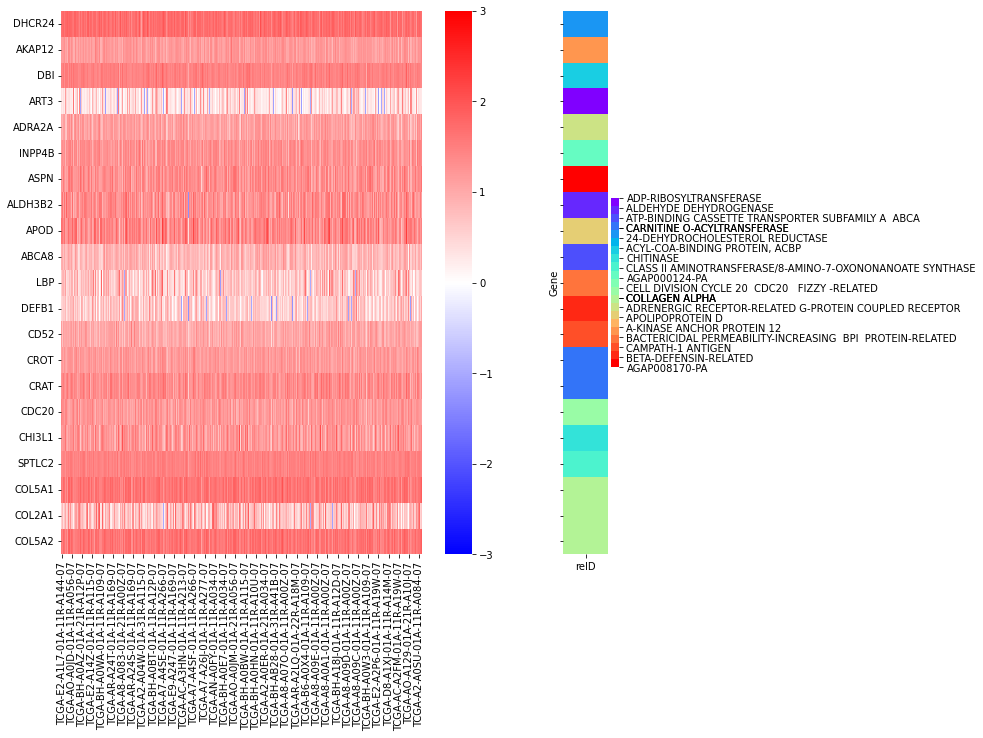

In [10]:
# Create a subplot
fig, axes = plt.subplots(1,2, figsize=(10,10), sharey=True, gridspec_kw = {"width_ratios" : [4,.5]})
axes = axes.flatten()

# Gene cut off
end = end

# Gene pathway color palette
cmap = cm.get_cmap('rainbow_r', end)

# Genes from expression df
df =  df.T[list(genes_overlap)].T.iloc[:end,:]
df = pd.concat([df, pathway_grouping.loc[:,"Pathway"]], axis = 1)
df = df.sort_values("Pathway")
# display(df)
genes = df.index.tolist()
# print(genes)
# print()

# Expression and pathway df
display(pathway_grouping)
pathway_goruping = pathway_grouping.T[list(genes_overlap)].T
sns.heatmap(pathway_grouping.loc[genes].iloc[:,-1:], ax=axes[1], cmap = cmap) # Pathways
sns.heatmap(df.iloc[:,:-1], vmin=-3, vmax=3, ax=axes[0], cmap= "bwr") # Expression 


#### customize colorbar ####
colorbar = axes[1].collections[0].colorbar
    
ID_list = pathway_grouping_ID.loc[genes].iloc[:end,:].loc[:,"Family ID"].tolist()[:end] # subplot 2 output (pathway IDs)

# Set tick range and labels
    # yet another dictionary for colorbar
colorbar_range = reID_list

actual_colorbar_range = [*range(len(reID_list))]
layer3_colorbar_range = dict(zip(actual_colorbar_range, colorbar_range))
# print(f'layer3_colorbar_range = {layer3_colorbar_range}')
# print()

colorbar.set_ticks(colorbar_range)

# Dictionary for colorbar
colorbar_dict = dict(zip(colorbar_range, reID_list))
# print(f'colorbar Dict = {colorbar_dict}')
# print()

# print(f'Colorbar range = {colorbar_range}')
# print()
# print(f'List of genes = {ID_list}') # Genes
# print()
# print(f'reID from colorbar = {[colorbar_dict[ID] for ID in colorbar_range]}')
# print()
# print(f'Family ID from dict = {[familyID_dict[ID] for ID in ID_list]}') # ID dict
# print()
famID = [colorbar_dict[ID] for ID in colorbar_range]

# print(f'Family ID from dict using famID = {[familyID_dict[ID] for ID in famID]}') # ID dict


colorbar.set_ticklabels([familyID_dict[ID] for ID in ID_list]) # Return pathway names from ID

In [11]:
fig.savefig('Gene_Pathway_Annotation.pdf')